In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [ ]:
#reading data

In [4]:
application_df = pd.read_csv("application_data.csv")
prev_ap_df = pd.read_csv("previous_application.csv")

In [5]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
prev_ap_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
print(application_df.shape)

print(prev_ap_df.shape)

(307511, 122)
(1670214, 37)


In [10]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [11]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [12]:
#Checking Data Imbalance

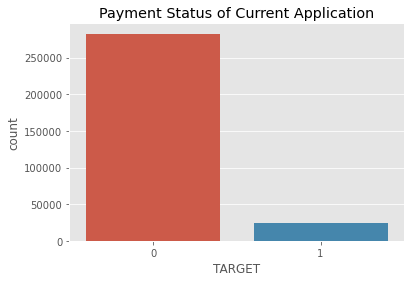

In [13]:
plt.title("Payment Status of Current Application")
sns.countplot(application_df['TARGET'])
plt.show()

In [14]:
#Data Imbalance Ratio

In [15]:
non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("No. of non-defaulters: ", non_default.shape[0])

No. of defaulters:  24825
No. of non-defaulters:  282686


In [16]:
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.072881945686495


In [17]:
#Segment 1: Documents Submitted by Applicant

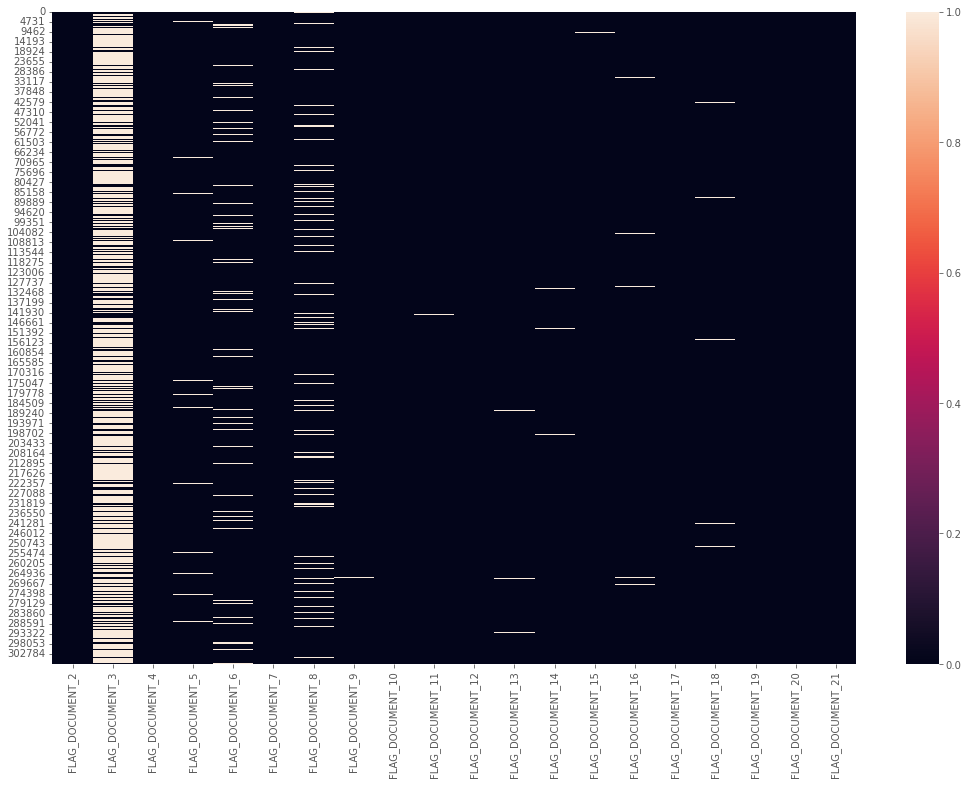

In [18]:
starting_idx = application_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,starting_idx:ending_idx])
plt.show()

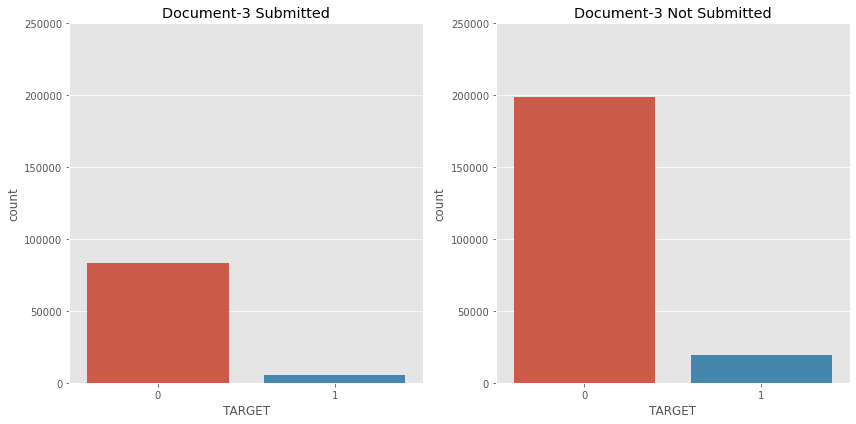

In [19]:
# Using equal ylim to for better visibilty

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Not Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()


In [20]:
#Segment 2 : Housing Information of Applicant

In [21]:
starting_idx = application_df.columns.get_loc("APARTMENTS_AVG") 
ending_idx = application_df.columns.get_loc("EMERGENCYSTATE_MODE")

In [22]:
housing_df = application_df.iloc[:, starting_idx:ending_idx+1]
housing_df['TARGET'] = application_df["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_df["NAME_HOUSING_TYPE"]

In [23]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [24]:
housing_df_missing = missingdata_percentage(housing_df)
housing_df_missing.sort_values("percentage")


category  percentage
46           EMERGENCYSTATE_MODE   47.398304
44                TOTALAREA_MODE   48.268517
2    YEARS_BEGINEXPLUATATION_AVG   48.781019
30  YEARS_BEGINEXPLUATATION_MEDI   48.781019
16  YEARS_BEGINEXPLUATATION_MODE   48.781019
35                FLOORSMAX_MEDI   49.760822
7                  FLOORSMAX_AVG   49.760822
21                FLOORSMAX_MODE   49.760822
43                HOUSETYPE_MODE   50.176091
39               LIVINGAREA_MEDI   50.193326
11                LIVINGAREA_AVG   50.193326
25               LIVINGAREA_MODE   50.193326
6                  ENTRANCES_AVG   50.348768
34                ENTRANCES_MEDI   50.348768
20                ENTRANCES_MODE   50.348768
28               APARTMENTS_MEDI   50.749729
0                 APARTMENTS_AVG   50.749729
14               APARTMENTS_MODE   50.749729
45            WALLSMATERIAL_MODE   50.840783
19                ELEVATORS_MODE   53.295980
5                  ELEVATORS_AVG   53.295980
33                ELEVATORS_MEDI   53.295980
13             NONLIVINGAREA_AVG   55.179164
41            NONLIVINGAREA_MEDI   55.179164
27            NONLIVINGAREA_MODE   55.179164
1               BASEMENTAREA_AVG   58.515956
29             BASEMENTAREA_MEDI   58.515956
15             BASEMENTAREA_MODE   58.515956
23                 LANDAREA_MODE   59.376738
37                 LANDAREA_MEDI   59.376738
9                   LANDAREA_AVG   59.376738
3                YEARS_BUILD_AVG   66.497784
17              YEARS_BUILD_MODE   66.497784
31              YEARS_BUILD_MEDI   66.497784
8                  FLOORSMIN_AVG   67.848630
36                FLOORSMIN_MEDI   67.848630
22                FLOORSMIN_MODE   67.848630
10          LIVINGAPARTMENTS_AVG   68.354953
38         LIVINGAPARTMENTS_MEDI   68.354953
24         LIVINGAPARTMENTS_MODE   68.354953
42            FONDKAPREMONT_MODE   68.386172
26      NONLIVINGAPARTMENTS_MODE   69.432963
12       NONLIVINGAPARTMENTS_AVG   69.432963
40      NONLIVINGAPARTMENTS_MEDI   69.432963
4                 COMMONAREA_AVG   69.872297
18               COMMONAREA_MODE   69.872297
32               COMMONAREA_MEDI   69.872297

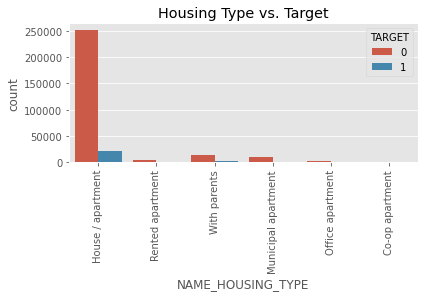

In [25]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()


In [26]:
value_wise_defaulter_percentage(application_df, 'NAME_HOUSING_TYPE')

Value  Percentage of Defaulter
1     Rented apartment                12.313051
2         With parents                11.698113
3  Municipal apartment                 8.539748
5      Co-op apartment                 7.932264
0    House / apartment                 7.795711
4     Office apartment                 6.572411

In [27]:
#Segment 3 :Social Circle Info

In [28]:
start_idx = application_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_df.iloc[:, start_idx:end_idx+1]

In [29]:

social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [30]:
social_circle_df.describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [31]:
sns.heatmap(social_circle_df.corr(), annot=True)

<AxesSubplot:>

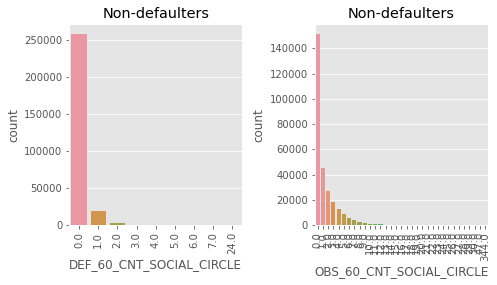

In [32]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=non_default)
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

In [33]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=default)
    plt.title("Defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

In [35]:
#Segment 4 : Region related data

In [36]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:, start_idx:end_idx+1]

In [37]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
region_df["TARGET"] = application_df["TARGET"]

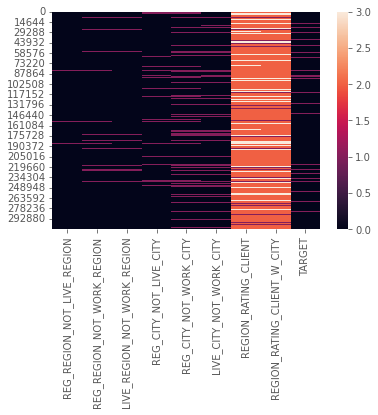

In [38]:
sns.heatmap(region_df)
plt.show()

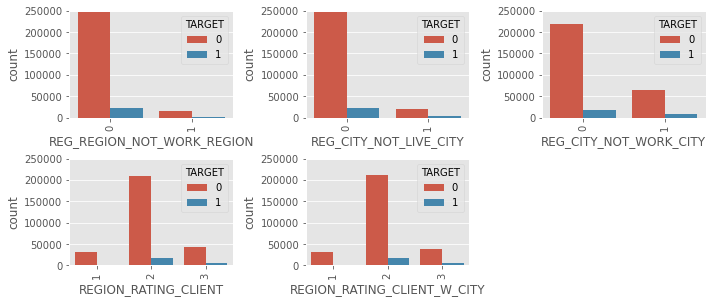

In [39]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [40]:
#Segment 5: Contact Related Info

In [41]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


In [42]:
#Segment 6: Asset Details

In [43]:
application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


In [44]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_df['FLAG_OWN_CAR'], hue=application_df['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_df['FLAG_OWN_REALTY'], hue=application_df['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()


In [45]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

In [46]:
#Segment 7: Family Related Info

In [47]:
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [48]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS

application_df = application_df.dropna(subset=['CNT_FAM_MEMBERS']) 
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [49]:
# Since number of family member cannot have fraction, converting to Integer

application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)
application_df[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


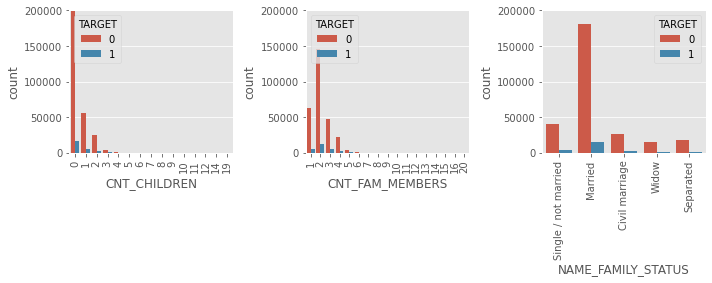

In [50]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [51]:
value_wise_defaulter_percentage(application_df, 'NAME_FAMILY_STATUS')

Value  Percentage of Defaulter
2        Civil marriage                 9.944584
0  Single / not married                 9.807675
4             Separated                 8.194234
1               Married                 7.559868
3                 Widow                 5.824217

In [52]:
value_wise_defaulter_percentage(application_df, 'CNT_CHILDREN')

Value  Percentage of Defaulter
9     9.0               100.000000
10   11.0               100.000000
7     6.0                28.571429
4     4.0                12.820513
3     3.0                 9.631423
1     1.0                 8.923575
2     2.0                 8.721821
6     5.0                 8.333333
0     0.0                 7.711881
5     7.0                 0.000000
8     8.0                 0.000000
11   12.0                 0.000000
12   10.0                 0.000000
13   19.0                 0.000000
14   14.0                 0.000000

In [53]:
application_df.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [54]:

value_wise_defaulter_percentage(application_df, 'CNT_FAM_MEMBERS')

Value  Percentage of Defaulter
16   11.0               100.000000
10   13.0               100.000000
9    10.0                33.333333
8     8.0                30.000000
5     6.0                13.480392
4     5.0                 9.401955
2     3.0                 8.760290
3     4.0                 8.648824
0     1.0                 8.364408
1     2.0                 7.583498
7     7.0                 7.407407
6     9.0                 0.000000
11   14.0                 0.000000
12   12.0                 0.000000
13   20.0                 0.000000
14   15.0                 0.000000
15   16.0                 0.000000

In [55]:
application_df.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [56]:
#Segment 8: Education and Occupation Info

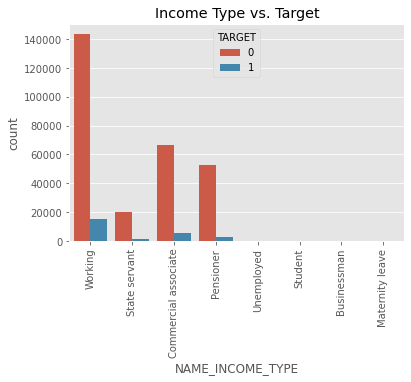

In [57]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [58]:
value_wise_defaulter_percentage(application_df,'NAME_INCOME_TYPE')

Value  Percentage of Defaulter
7       Maternity leave                40.000000
4            Unemployed                36.363636
0               Working                 9.588472
2  Commercial associate                 7.484466
1         State servant                 5.754965
3             Pensioner                 5.386366
5               Student                 0.000000
6           Businessman                 0.000000

In [59]:
application_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [60]:
value_wise_defaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

Value  Percentage of Defaulter
3                Lower secondary                10.930537
0  Secondary / secondary special                 8.939929
2              Incomplete higher                 8.484966
1               Higher education                 5.355187
4                Academic degree                 1.829268

In [61]:
application_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [62]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

application_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)
value_wise_defaulter_percentage(application_df, 'OCCUPATION_TYPE')

Value  Percentage of Defaulter
14     Low-skill Laborers                17.152413
5                 Drivers                11.326130
13   Waiters/barmen staff                11.275964
11         Security staff                10.742449
0                Laborers                10.578770
8           Cooking staff                10.443996
6             Sales staff                 9.631799
7          Cleaning staff                 9.606705
15          Realty agents                 7.856192
16            Secretaries                 7.049808
10         Medicine staff                 6.700246
9   Private service staff                 6.598793
4                 Unknown                 6.513056
17               IT staff                 6.463878
18               HR staff                 6.394316
1              Core staff                 6.303954
3                Managers                 6.214319
12  High skill tech staff                 6.159930
2             Accountants                 4.830819

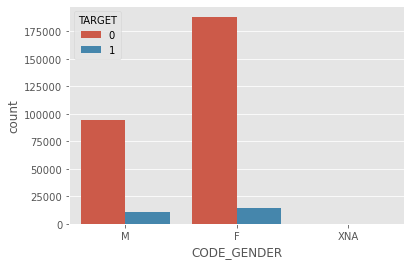

In [63]:
sns.countplot(application_df['CODE_GENDER'], hue=application_df["TARGET"])
plt.show()

In [64]:
# Converting DAYS_BIRTH to age

application_df["Age"] = application_df.DAYS_BIRTH//(-365.25) 
application_df[["Age"]].describe()

Age
count  307509.000000
mean       43.405198
std        11.945793
min        20.000000
25%        33.000000
50%        43.000000
75%        53.000000
max        69.000000

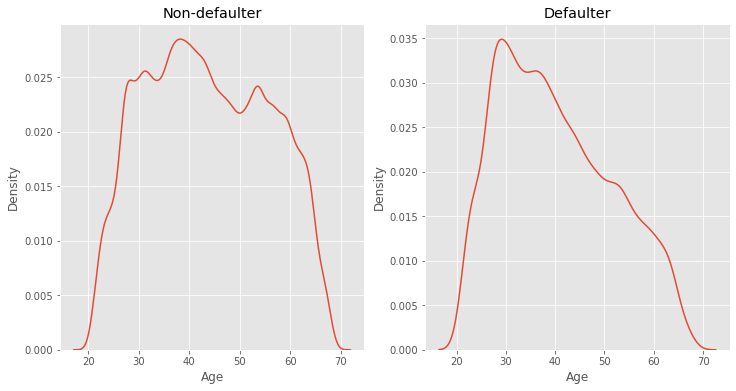

In [65]:
# Dropping the column as new column will be used for analysis

application_df.drop("DAYS_BIRTH", inplace=True, axis=1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

In [66]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [67]:
#Top 10 correlation for Defaulters

In [68]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

In [69]:
#Top 10 Correlation for Non-defaulters

In [70]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64